### load packages

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### read data

In [3]:
#read gdp

gdp_file_dir = 'state_gdp_raw_in_millions.csv'
state_gdp = pd.read_csv(gdp_file_dir, index_col = 'Geography') # take GDP，column: name Geo

Q1_gdp = pd.DataFrame(state_gdp, columns = ['2020 Q1'])
gdp_25_withUS = Q1_gdp.nlargest(26,'2020 Q1')

gdp_25_withoutUS = gdp_25_withUS[1:] #without the first row:USA
gdp_25_withoutUS.head(26).astype(int)

,2020 Q1
Geography,
California,3171221
Texas,1805780
New York,1762518
Florida,1116161
Illinois,877747
Pennsylvania,802664
Ohio,690048
New Jersey,638617
Georgia,625826


In [4]:
#read covid case

covin_case = pd.read_csv('Cases number.csv', index_col = 'State/Territory')

gdp_case_25 = gdp_25_withoutUS.merge(covin_case, how= 'left', left_index= True, right_index= True) #merge top 25 GDP with covin
gdp_case_25 = gdp_case_25.fillna(0)
top5cases = gdp_case_25.nlargest(5, 'Case Rate per 100000') #top 5 case rate
top5cases.index.name = "State"
df_t5 = pd.DataFrame(top5cases, columns = ['Case Rate per 100000'])
confirmed_portion = df_t5["Case Rate per 100000"]/1000
df_t5.insert(0, 'confirmed_portion(%)', confirmed_portion)
df_t5

,confirmed_portion(%),Case Rate per 100000
State,,
Tennessee,12.692,12692.0
Arizona,12.258,12258.0
Wisconsin,11.632,11632.0
New Jersey,11.511,11511.0
Indiana,11.180,11180.0


In [6]:
#read unemployment rate

unemployment = pd.read_csv("unemployment_rate_202005-202105.csv")
unemployment.set_index("Geography", inplace=True)
unemployment.index.name = "State"
unemployment.head()

,2020/1/1,2020/2/1,2020/3/1,2020/4/1,2020/5/1,2020/6/1,2020/7/1,2020/8/1,2020/9/1,2020/10/1,2020/11/1,2020/12/1,2021/1/1,2021/2/1,2021/3/1,2021/4/1,2021/5/1
State,,,,,,,,,,,,,,,,,
United States,3.5,3.5,4.4,14.8,13.3,11.1,10.2,8.4,7.8,6.9,6.7,6.7,6.3,6.2,6.0,6.1,5.8
Alabama,2.7,2.6,2.6,13.2,7.9,7.7,7.4,7.1,6.7,4.7,4.7,4.7,4.3,4.0,3.8,3.6,3.4
Alaska,5.0,5.1,5.1,11.8,11.6,11.3,11.0,7.2,7.0,6.5,6.5,6.5,6.6,6.6,6.7,6.7,6.7
Arizona,4.8,4.9,5.0,14.2,10.6,10.7,10.4,7.0,6.9,6.8,6.8,6.8,6.7,6.9,6.7,6.7,6.7
Arkansas,3.7,3.8,3.9,10,8.5,7.8,7.1,6.5,5.9,5.6,5.3,4.9,4.6,4.5,4.4,4.4,4.4


In [8]:
#read vaccine 345 monlthly data + pivot 

vaccine_data = pd.read_csv("vaccine row data.csv", index_col="Location")
ME_vaccine_data = pd.DataFrame(vaccine_data, columns=["Date", "Series_Complete_Pop_Pct"])
PV_ME_vaccine = ME_vaccine_data.pivot(index = None,
                                      columns = "Date",
                                      values = "Series_Complete_Pop_Pct")

PV_ME_vaccine = pd.DataFrame(PV_ME_vaccine, columns = ["03/31/2021" , "04/30/2021", "05/31/2021"])
stateabbr = pd.read_csv("State Abbr..csv")
stateabbr = pd.DataFrame(stateabbr, columns = ["State", "Location"])


PV_ME_vaccine = pd.merge(PV_ME_vaccine, stateabbr, on = ['Location'], how = 'right')
PV_ME_vaccine.set_index("State" , inplace=True)
#rename column name
PV_ME_vaccine = PV_ME_vaccine.rename(columns={'03/31/2021':'2021/03 Vaccine Rate', '04/30/2021':'2021/04 Vaccine Rate', '05/31/2021':'2021/05 Vaccine Rate'})
PV_ME_vaccine.dropna(how = "all", inplace = True)
PV_ME_vaccine.head()

C:\Users\lilian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,8,10,12,14,16,17,30,32,36,40,42,45,47,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Location,2021/03 Vaccine Rate,2021/04 Vaccine Rate,2021/05 Vaccine Rate
State,,,,
Alabama,AL,13.4,23.3,29.2
Alaska,AK,22.3,35.1,39.3
Arizona,AZ,17.1,28.9,36.1
Arkansas,AR,13.9,25.4,31.2
California,CA,16.1,30.2,43.2


### data manipulation

In [9]:
#combine unemployment + vaccine report

unem_vacc = pd.merge(PV_ME_vaccine, unemployment, on = ["State"])

#top ５ state to analyze
unem_vacc_T5 = pd.merge(unem_vacc, top5cases, on = ['State'], how = 'right')
unem_vacc_T5

,Location,2021/03 Vaccine Rate,2021/04 Vaccine Rate,2021/05 Vaccine Rate,2020/1/1,2020/2/1,2020/3/1,2020/4/1,2020/5/1,2020/6/1,...,% Positive Last 30 Days,% Positive Last 7 Days,# Tests per 100K,Total # Tests,# Tests per 100K Last 7 Days,Total # Tests Last 7 Days,# Tests per 100K Last 30 Days,Total # Tests Last 30 Days,New Cases,New Deaths
State,,,,,,,,,,,,,,,,,,,,,
Tennessee,TN,13.8,24.5,31.8,3.7,3.9,4.0,15.8,9.6,9.3,...,3-4.9%,< 3%,104972.55,7168758.0,229.71,15687.0,1922.25,131274.0,68.0,7.0
Arizona,AZ,17.1,28.9,36.1,4.8,4.9,5.0,14.2,10.6,10.7,...,3-4.9%,5-7.9%,110864.59,8069520.0,901.56,65622.0,4063.48,295769.0,587.0,28.0
Wisconsin,WI,18.5,35.3,44.6,3.3,3.3,3.2,14.8,10.4,8.6,...,< 3%,< 3%,167236.79,9737252.0,1070.21,62312.0,5284.35,307678.0,66.0,7.0
New Jersey,NJ,18.7,36.1,48.8,3.7,3.7,3.8,16.6,16.5,16.3,...,< 3%,< 3%,164177.22,14582533.0,1744.61,154960.0,8080.47,717723.0,349.0,12.0
Indiana,IN,16.7,26.8,35.5,3.2,3.2,3.3,16.9,12.0,10.1,...,3-4.9%,< 3%,130847.59,8808946.0,720.30,48492.0,3812.37,256657.0,304.0,3.0


In [10]:
#Rename the columns we want
unem_vacc_T5 = unem_vacc_T5.rename(columns={'2021/03 Vaccine Rate':'03_vac','2021/04 Vaccine Rate':'04_vac',
                       '2021/05 Vaccine Rate':'05_vac','2021/3/1':'03_unem','2021/4/1':'04_unem','2021/5/1':'05_unem'})
unem_vacc_T5

,Location,03_vac,04_vac,05_vac,2020/1/1,2020/2/1,2020/3/1,2020/4/1,2020/5/1,2020/6/1,...,% Positive Last 30 Days,% Positive Last 7 Days,# Tests per 100K,Total # Tests,# Tests per 100K Last 7 Days,Total # Tests Last 7 Days,# Tests per 100K Last 30 Days,Total # Tests Last 30 Days,New Cases,New Deaths
State,,,,,,,,,,,,,,,,,,,,,
Tennessee,TN,13.8,24.5,31.8,3.7,3.9,4.0,15.8,9.6,9.3,...,3-4.9%,< 3%,104972.55,7168758.0,229.71,15687.0,1922.25,131274.0,68.0,7.0
Arizona,AZ,17.1,28.9,36.1,4.8,4.9,5.0,14.2,10.6,10.7,...,3-4.9%,5-7.9%,110864.59,8069520.0,901.56,65622.0,4063.48,295769.0,587.0,28.0
Wisconsin,WI,18.5,35.3,44.6,3.3,3.3,3.2,14.8,10.4,8.6,...,< 3%,< 3%,167236.79,9737252.0,1070.21,62312.0,5284.35,307678.0,66.0,7.0
New Jersey,NJ,18.7,36.1,48.8,3.7,3.7,3.8,16.6,16.5,16.3,...,< 3%,< 3%,164177.22,14582533.0,1744.61,154960.0,8080.47,717723.0,349.0,12.0
Indiana,IN,16.7,26.8,35.5,3.2,3.2,3.3,16.9,12.0,10.1,...,3-4.9%,< 3%,130847.59,8808946.0,720.30,48492.0,3812.37,256657.0,304.0,3.0


In [11]:
#Extract the columns we want (unemployment rate and vaccine rate from March to May)

va_un03_05 = unem_vacc_T5[['Location','03_unem', '03_vac',  '04_unem','04_vac', '05_unem','05_vac']]
va_un03_05

,Location,03_unem,03_vac,04_unem,04_vac,05_unem,05_vac
State,,,,,,,
Tennessee,TN,5.1,13.8,5.0,24.5,5.0,31.8
Arizona,AZ,6.7,17.1,6.7,28.9,6.7,36.1
Wisconsin,WI,3.8,18.5,3.9,35.3,3.9,44.6
New Jersey,NJ,7.6,18.7,7.5,36.1,7.2,48.8
Indiana,IN,3.9,16.7,3.9,26.8,4.0,35.5


In [12]:
#To make vaccination and unemployment rate of the states in the same column, we need to transpose the data

va_un03_05.loc[len(va_un03_05.index)]=['Location','03_unem','03_vac','04_unem','04_vac','05_unem','05_vac'] #Create a row with inputs are the column name
va_un03_05
va_un03_05_1=va_un03_05.T #Transpose the data
va_un03_05_1

C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


State,Tennessee,Arizona,Wisconsin,New Jersey,Indiana,5
Location,TN,AZ,WI,NJ,IN,Location
03_unem,5.1,6.7,3.8,7.6,3.9,03_unem
03_vac,13.8,17.1,18.5,18.7,16.7,03_vac
04_unem,5.0,6.7,3.9,7.5,3.9,04_unem
04_vac,24.5,28.9,35.3,36.1,26.8,04_vac
05_unem,5.0,6.7,3.9,7.2,4.0,05_unem
05_vac,31.8,36.1,44.6,48.8,35.5,05_vac


### Tennessee

In [25]:
#After transpose, we further organize the dataframe
#The column 5 is generated when we add a new row. We will rename it later.
#Tennessee
va_un03_05_TN=va_un03_05_1[['Tennessee',5]] #Extract columns "Tennessee" and 5
va_un03_05_TN=pd.merge(va_un03_05_TN, (va_un03_05_TN[5].str.split('_',expand=True)),how='left',left_index=True, right_index=True) #Split the column "5" by"_"
va_un03_05_Tennessee=va_un03_05_TN[1:7] #Exclude the first row, because it is the state abbreviation name
va_un03_05_Tennessee.rename(columns={"Tennessee":"value",0:"month",1:"type"},inplace=True) #Rename columns
va_un03_05_Tennessee['value']=va_un03_05_Tennessee['value'].astype('float') #Manage datatype. Column "value" should be float
display(va_un03_05_Tennessee)

un03_05_Tennessee=va_un03_05_Tennessee.loc[va_un03_05_Tennessee['type']=='unem'] #filter 
va03_05_Tennessee=va_un03_05_Tennessee.loc[va_un03_05_Tennessee['type']=='vac']
display(un03_05_Tennessee)

         value        5 month  type
03_unem    5.1  03_unem    03  unem
03_vac    13.8   03_vac    03   vac
04_unem    5.0  04_unem    04  unem
04_vac    24.5   04_vac    04   vac
05_unem    5.0  05_unem    05  unem
05_vac    31.8   05_vac    05   vac
         value        5 month  type
03_unem    5.1  03_unem    03  unem
04_unem    5.0  04_unem    04  unem
05_unem    5.0  05_unem    05  unem


C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-25-8a999164551e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_un03_05_Tennessee['value']=va_un03_05_Tennessee['value'].astype('float') #Manage datatype. Column "value" should be float


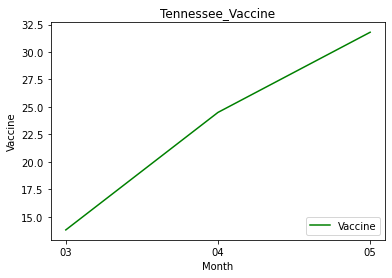

In [26]:
#vaccine rate

plt.plot(va03_05_Tennessee.month,va03_05_Tennessee.value,'g',label='Vaccine')
plt.xlabel('Month')
plt.ylabel('Vaccine')
plt.xticks(va03_05_Tennessee.month)
plt.title('Tennessee_Vaccine')
plt.legend(loc='lower right')
plt.show()

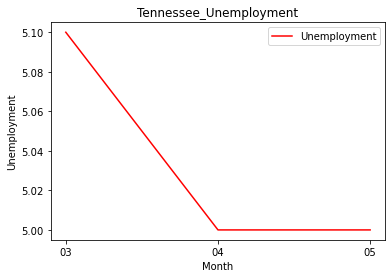

In [27]:
#unemployment rate
plt.plot(un03_05_Tennessee.month,un03_05_Tennessee.value,'r',label='Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.xticks(un03_05_Tennessee.month)
plt.title('Tennessee_Unemployment')
plt.legend(loc='upper right')
plt.show()

### Arizona

In [28]:
#Arizona
va_un03_05_AZ=va_un03_05_1[['Arizona',5]]
va_un03_05_AZ=pd.merge(va_un03_05_AZ, (va_un03_05_AZ[5].str.split('_',expand=True)),how='left',left_index=True, right_index=True)
va_un03_05_Arizona=va_un03_05_AZ[1:7]
va_un03_05_Arizona.rename(columns={"Arizona":"value",0:"month",1:"type"},inplace=True)
va_un03_05_Arizona['value']=va_un03_05_Arizona['value'].astype('float')
display(va_un03_05_Arizona)

un03_05_Arizona=va_un03_05_Arizona.loc[va_un03_05_Arizona['type']=='unem'] #filter 
va03_05_Arizona=va_un03_05_Arizona.loc[va_un03_05_Arizona['type']=='vac']
un03_05_Arizona
display(va03_05_Arizona)

         value        5 month  type
03_unem    6.7  03_unem    03  unem
03_vac    17.1   03_vac    03   vac
04_unem    6.7  04_unem    04  unem
04_vac    28.9   04_vac    04   vac
05_unem    6.7  05_unem    05  unem
05_vac    36.1   05_vac    05   vac
        value       5 month type
03_vac   17.1  03_vac    03  vac
04_vac   28.9  04_vac    04  vac
05_vac   36.1  05_vac    05  vac


C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-28-c21bc18245c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_un03_05_Arizona['value']=va_un03_05_Arizona['value'].astype('float')


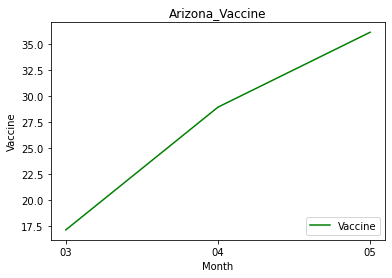

In [29]:
#vaccine rate
plt.plot(va03_05_Arizona.month,va03_05_Arizona.value,'g',label='Vaccine')
plt.xlabel('Month')
plt.ylabel('Vaccine')
plt.xticks(va03_05_Arizona.month)
plt.title('Arizona_Vaccine')
plt.legend(loc='lower right')
plt.show()

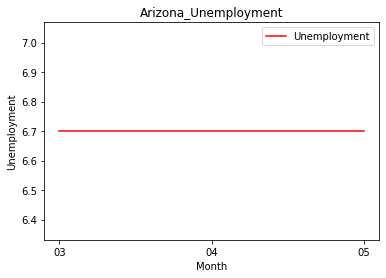

In [30]:
#unemployment rate
plt.plot(un03_05_Arizona.month,un03_05_Arizona.value,'r',label='Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.xticks(un03_05_Arizona.month)
plt.title('Arizona_Unemployment')
plt.legend(loc='upper right')
plt.show()

### Wisconsin

In [32]:
#Wisconsin
va_un03_05_WI=va_un03_05_1[['Wisconsin',5]]
va_un03_05_WI=pd.merge(va_un03_05_WI, (va_un03_05_WI[5].str.split('_',expand=True)),how='left',left_index=True, right_index=True)
va_un03_05_Wisconsin=va_un03_05_WI[1:7]
va_un03_05_Wisconsin.rename(columns={"Wisconsin":"value",0:"month",1:"type"},inplace=True)
va_un03_05_Wisconsin['value']=va_un03_05_Wisconsin['value'].astype('float')
display(va_un03_05_Wisconsin)

un03_05_Wisconsin=va_un03_05_Wisconsin.loc[va_un03_05_Wisconsin['type']=='unem'] #filter 
va03_05_Wisconsin=va_un03_05_Wisconsin.loc[va_un03_05_Wisconsin['type']=='vac']
un03_05_Wisconsin
display(va03_05_Wisconsin)

         value        5 month  type
03_unem    3.8  03_unem    03  unem
03_vac    18.5   03_vac    03   vac
04_unem    3.9  04_unem    04  unem
04_vac    35.3   04_vac    04   vac
05_unem    3.9  05_unem    05  unem
05_vac    44.6   05_vac    05   vac
        value       5 month type
03_vac   18.5  03_vac    03  vac
04_vac   35.3  04_vac    04  vac
05_vac   44.6  05_vac    05  vac


C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-32-08ce9c9fd9b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_un03_05_Wisconsin['value']=va_un03_05_Wisconsin['value'].astype('float')


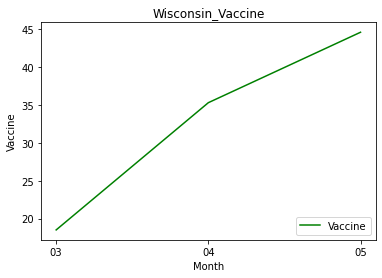

In [33]:
#vaccine rate
plt.plot(va03_05_Wisconsin.month,va03_05_Wisconsin.value,'g',label='Vaccine')
plt.xlabel('Month')
plt.ylabel('Vaccine')
plt.xticks(va03_05_Wisconsin.month)
plt.title('Wisconsin_Vaccine')
plt.legend(loc='lower right')
plt.show()

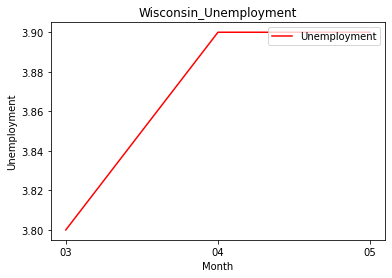

In [34]:
#unemployment rate
plt.plot(un03_05_Wisconsin.month,un03_05_Wisconsin.value,'r',label='Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.xticks(un03_05_Wisconsin.month)
plt.title('Wisconsin_Unemployment')
plt.legend(loc='upper right')
plt.show()

### NewJersey

In [36]:
#NewJersey
va_un03_05_NJ=va_un03_05_1[['New Jersey',5]]
va_un03_05_NJ=pd.merge(va_un03_05_NJ, (va_un03_05_NJ[5].str.split('_',expand=True)),how='left',left_index=True, right_index=True)
va_un03_05_NewJersey=va_un03_05_NJ[1:7]
va_un03_05_NewJersey.rename(columns={"New Jersey":"value",0:"month",1:"type"},inplace=True)
va_un03_05_NewJersey['value']=va_un03_05_NewJersey['value'].astype('float')
display(va_un03_05_NewJersey)

un03_05_NewJersey=va_un03_05_NewJersey.loc[va_un03_05_NewJersey['type']=='unem'] #filter 
va03_05_NewJersey=va_un03_05_NewJersey.loc[va_un03_05_NewJersey['type']=='vac']
un03_05_NewJersey
display(va03_05_NewJersey)

C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-36-3aa07f8455e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_un03_05_NewJersey['value']=va_un03_05_NewJersey['value'].astype('float')


,value,5,month,type
03_unem,7.6,03_unem,03,unem
03_vac,18.7,03_vac,03,vac
04_unem,7.5,04_unem,04,unem
04_vac,36.1,04_vac,04,vac
05_unem,7.2,05_unem,05,unem
05_vac,48.8,05_vac,05,vac


,value,5,month,type
03_vac,18.7,03_vac,03,vac
04_vac,36.1,04_vac,04,vac
05_vac,48.8,05_vac,05,vac


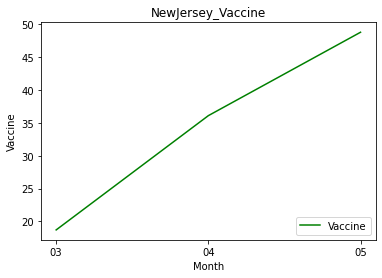

In [39]:
#vaccine rate
plt.plot(va03_05_NewJersey.month,va03_05_NewJersey.value,'g',label='Vaccine')
plt.xlabel('Month')
plt.ylabel('Vaccine')
plt.xticks(va03_05_NewJersey.month)
plt.title('NewJersey_Vaccine')
plt.legend(loc='lower right')
plt.show()

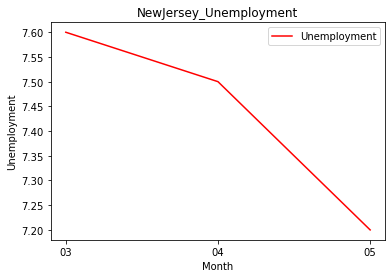

In [40]:
#unemployment rate
plt.plot(un03_05_NewJersey.month,un03_05_NewJersey.value,'r',label='Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.xticks(un03_05_NewJersey.month)
plt.title('NewJersey_Unemployment')
plt.legend(loc='upper right')
plt.show()

### Indiana

In [41]:
#Indiana
va_un03_05_IN=va_un03_05_1[['Indiana',5]]
va_un03_05_IN=pd.merge(va_un03_05_IN, (va_un03_05_NJ[5].str.split('_',expand=True)),how='left',left_index=True, right_index=True)
va_un03_05_Indiana=va_un03_05_IN[1:7]
va_un03_05_Indiana.rename(columns={"Indiana":"value",0:"month",1:"type"},inplace=True)
va_un03_05_Indiana['value']=va_un03_05_Indiana['value'].astype('float')
display(va_un03_05_Indiana)

un03_05_Indiana=va_un03_05_Indiana.loc[va_un03_05_Indiana['type']=='unem'] #filter 
va03_05_Indiana=va_un03_05_Indiana.loc[va_un03_05_Indiana['type']=='vac']
un03_05_Indiana
display(va03_05_Indiana)

C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-41-3f250e0693c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_un03_05_Indiana['value']=va_un03_05_Indiana['value'].astype('float')


,value,5,month,type
03_unem,3.9,03_unem,03,unem
03_vac,16.7,03_vac,03,vac
04_unem,3.9,04_unem,04,unem
04_vac,26.8,04_vac,04,vac
05_unem,4.0,05_unem,05,unem
05_vac,35.5,05_vac,05,vac


,value,5,month,type
03_vac,16.7,03_vac,03,vac
04_vac,26.8,04_vac,04,vac
05_vac,35.5,05_vac,05,vac


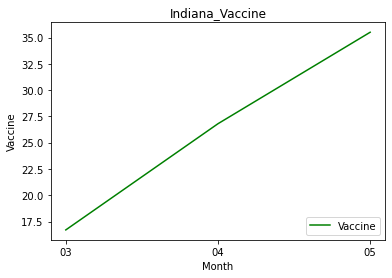

In [42]:
#vaccine rate
plt.plot(va03_05_Indiana.month,va03_05_Indiana.value,'g',label='Vaccine')
plt.xlabel('Month')
plt.ylabel('Vaccine')
plt.xticks(va03_05_Indiana.month)
plt.title('Indiana_Vaccine')
plt.legend(loc='lower right')
plt.show()

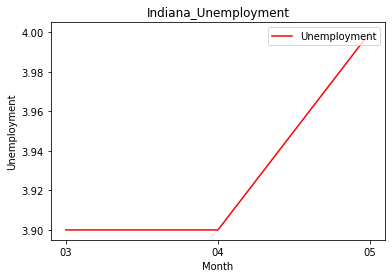

In [43]:
#unemployment rate
plt.plot(un03_05_Indiana.month,un03_05_Indiana.value,'r',label='Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.xticks(un03_05_Indiana.month)
plt.title('Indiana_Unemployment')
plt.legend(loc='upper right')
plt.show()

### overall data

In [44]:
#The overall data of vaccine rate and unemployment rate for all the states in the U.S. (from March to May)
#We want to draw scatterplots by month to understand the overall relationship between "unemployment rate" and "vaccine rate"
unem_vacc_all = unem_vacc[['Location', '2021/03 Vaccine Rate', '2021/3/1','2021/04 Vaccine Rate','2021/4/1','2021/05 Vaccine Rate','2021/5/1']]
unem_vacc_all.columns=['Location', '03_vac','03_unem','04_vac','04_unem','05_vac','05_unem']
unem_vacc_all

,Location,03_vac,03_unem,04_vac,04_unem,05_vac,05_unem
State,,,,,,,
Alabama,AL,13.4,3.8,23.3,3.6,29.2,3.4
Alaska,AK,22.3,6.7,35.1,6.7,39.3,6.7
Arizona,AZ,17.1,6.7,28.9,6.7,36.1,6.7
Arkansas,AR,13.9,4.4,25.4,4.4,31.2,4.4
California,CA,16.1,8.3,30.2,8.0,43.2,7.9
Colorado,CO,17.5,6.4,32.2,6.4,45.3,6.2
Connecticut,CT,20.4,8.3,38.5,8.1,53.6,7.7
Delaware,DE,16.4,6.5,32.5,6.4,43.3,5.9
Florida,FL,15.8,4.7,29.0,4.8,39.2,4.9


In [45]:
#We first categorize states by their vaccine rate using quartile
def v_categories(x):
    if x['03_vac'] >unem_vacc_all['03_vac'].quantile(0.75): 
      return "Q3"
    elif x['03_vac'] >unem_vacc_all['03_vac'].quantile(0.5):
      return "Q2"
    elif x['03_vac'] > unem_vacc_all['03_vac'].quantile(0.25):
      return "Q1"
    else:
      return "Others"
  
    
def v_categories1(x):
    if x['04_vac'] >unem_vacc_all['04_vac'].quantile(0.75):
      return "Q3"
    elif x['04_vac'] >unem_vacc_all['04_vac'].quantile(0.5):
      return "Q2"
    elif x['04_vac'] > unem_vacc_all['04_vac'].quantile(0.25):
      return "Q1"
    else:
      return "Others"
  

def v_categories2(x):
    if x['05_vac'] >unem_vacc_all['05_vac'].quantile(0.75):
      return "Q3"
    elif x['05_vac'] >unem_vacc_all['05_vac'].quantile(0.5):
      return "Q2"
    elif x['05_vac'] > unem_vacc_all['05_vac'].quantile(0.25):
      return "Q1"
    else:
      return "Others"


unem_vacc_all.loc[:,"Category_mar"] = unem_vacc_all.apply(v_categories,axis=1)
unem_vacc_all.loc[:,"Category_apr"] = unem_vacc_all.apply(v_categories1,axis=1)
unem_vacc_all.loc[:,"Category_may"] = unem_vacc_all.apply(v_categories2,axis=1)
unem_vacc_all

C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\lilian\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Location,03_vac,03_unem,04_vac,04_unem,05_vac,05_unem,Category_mar,Category_apr,Category_may
State,,,,,,,,,,
Alabama,AL,13.4,3.8,23.3,3.6,29.2,3.4,Others,Others,Others
Alaska,AK,22.3,6.7,35.1,6.7,39.3,6.7,Q3,Q3,Q1
Arizona,AZ,17.1,6.7,28.9,6.7,36.1,6.7,Q2,Q1,Q1
Arkansas,AR,13.9,4.4,25.4,4.4,31.2,4.4,Others,Others,Others
California,CA,16.1,8.3,30.2,8.0,43.2,7.9,Others,Q1,Q2
Colorado,CO,17.5,6.4,32.2,6.4,45.3,6.2,Q2,Q2,Q2
Connecticut,CT,20.4,8.3,38.5,8.1,53.6,7.7,Q3,Q3,Q3
Delaware,DE,16.4,6.5,32.5,6.4,43.3,5.9,Q1,Q2,Q2
Florida,FL,15.8,4.7,29.0,4.8,39.2,4.9,Others,Q1,Q1


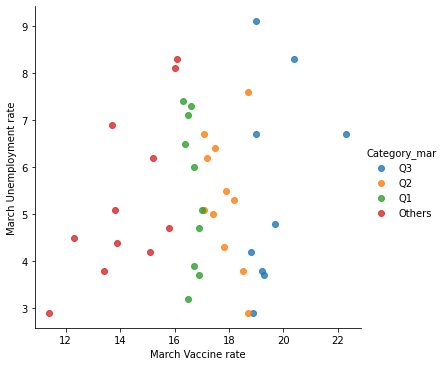

In [46]:
#Then we draw the scatterplot to see if there is an obvious relationship between the two variables
#March
import seaborn as sns
mar = sns.lmplot(x='03_vac',y='03_unem',hue ='Category_mar',hue_order=['Q3','Q2','Q1','Others'],data=unem_vacc_all,fit_reg = False)
mar.set_axis_labels('March Vaccine rate', 'March Unemployment rate')

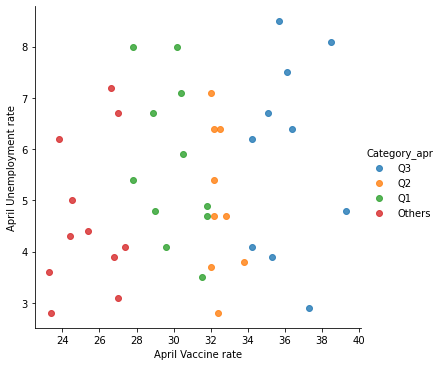

In [47]:
#April
apr = sns.lmplot(x='04_vac',y='04_unem',hue ='Category_apr',hue_order=['Q3','Q2','Q1','Others'],data=unem_vacc_all,fit_reg = False)
apr.set_axis_labels('April Vaccine rate', 'April Unemployment rate')

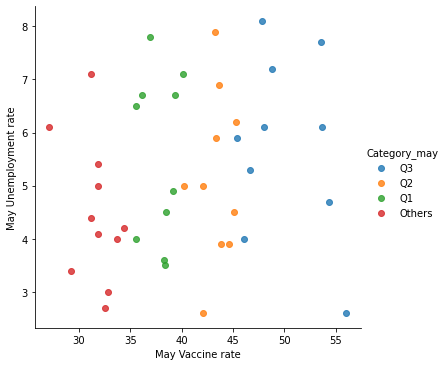

In [48]:
#May
may = sns.lmplot(x='05_vac',y='05_unem',hue ='Category_may',hue_order=['Q3','Q2','Q1','Others'],data=unem_vacc_all,fit_reg = False)
may.set_axis_labels('May Vaccine rate', 'May Unemployment rate')